In [20]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [23]:
from datetime import datetime
import datetime as dt
#start = dt.datetime(2003,1,1)
#end = dt.datetime(2022,1,1)

In [24]:
## Importing Dataset ##
Tata_df = pd.read_csv(r"D:\NSE-Tata-Global-Beverages-Limited\TATACONSUM.NS.csv")

In [25]:
Tata_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4974.000000,4974.000000,4974.000000,4974.000000,4974.000000,4.974000e+03
mean,171.402289,173.982283,168.635809,171.168533,159.861810,2.322771e+06
std,179.200373,181.354340,176.746466,179.003049,182.441767,2.475071e+06
min,14.090000,14.950000,14.090000,14.765000,10.403297,0.000000e+00
25%,74.000000,75.182501,72.599998,73.755003,57.591991,1.012436e+06
50%,118.000000,119.800003,116.099998,117.750000,101.838562,1.686484e+06
75%,164.987499,167.000000,162.087505,164.187496,148.069122,2.854455e+06
max,885.000000,889.000000,877.599976,882.099976,882.099976,6.355124e+07


In [26]:
Tata_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-01,16.639999,16.639999,16.639999,16.639999,11.238492,0.0
1,2002-05-02,16.799999,17.565001,16.665001,17.260000,11.657232,3712030.0
2,2002-05-03,17.400000,17.480000,17.215000,17.405001,11.755165,866420.0
3,2002-05-06,17.450001,17.799999,17.285000,17.520000,11.832838,1133500.0
4,2002-05-07,17.400000,17.690001,17.375000,17.469999,11.799067,678140.0


In [27]:
Tata_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4979,2022-04-29,815.000000,835.250000,813.000000,823.750000,823.750000,2268921.0
4980,2022-05-02,823.299988,828.650024,810.000000,824.400024,824.400024,1439813.0
4981,2022-05-04,824.400024,832.000000,800.799988,803.299988,803.299988,1817504.0
4982,2022-05-05,810.000000,812.000000,772.500000,776.349976,776.349976,5079723.0
4983,2022-05-06,770.000000,778.500000,762.950012,764.950012,764.950012,2003395.0


In [28]:
## Checking for null values ##
Tata_df.isnull().sum()
#Tata_df = Tata_df.dropna()
#Tata_df['Volume'][0] = Tata_df['Volume'].head(7).mean()


Date          0
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [29]:
Tata_df = Tata_df.dropna()

In [30]:
Tata_df['Volume'][0] = Tata_df['Volume'].head(7).mean()

In [31]:
Tata_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
Tata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4974 entries, 0 to 4983
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4974 non-null   object 
 1   Open       4974 non-null   float64
 2   High       4974 non-null   float64
 3   Low        4974 non-null   float64
 4   Close      4974 non-null   float64
 5   Adj Close  4974 non-null   float64
 6   Volume     4974 non-null   float64
dtypes: float64(6), object(1)
memory usage: 439.9+ KB


In [33]:
## Analysing the key attributes of our dataset ##

In [34]:
Tata_df["Date"]=pd.to_datetime(Tata_df.Date,format="%Y-%m-%d")
Tata_df.index=Tata_df['Date']


In [35]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [36]:
Tata_df['Close'].iplot(kind = 'line',title = 'Close Price History')

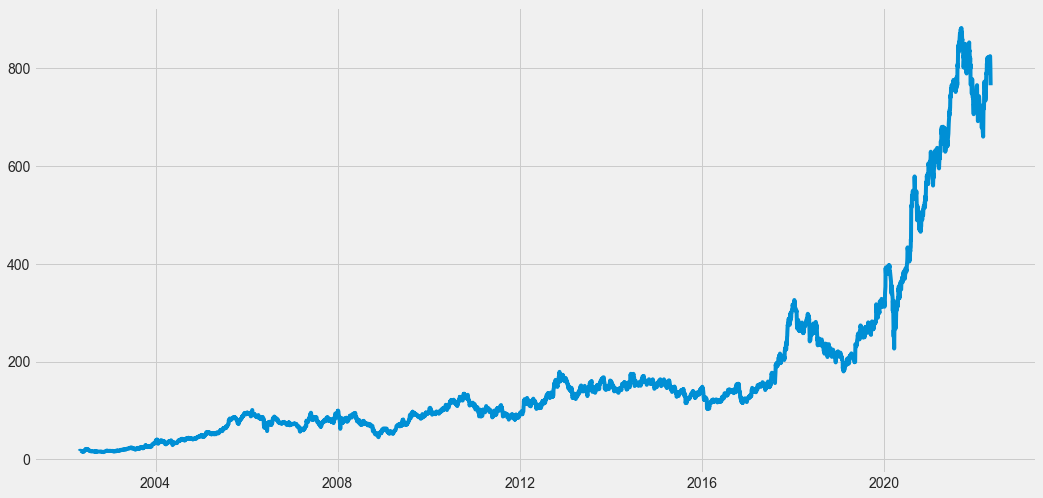

In [37]:
plt.figure(figsize=(16,8))
plt.plot(Tata_df["Close"],label='Close Price history')

In [38]:
Tata_df['Volume'].iplot(kind = 'line',title = 'Volume History')


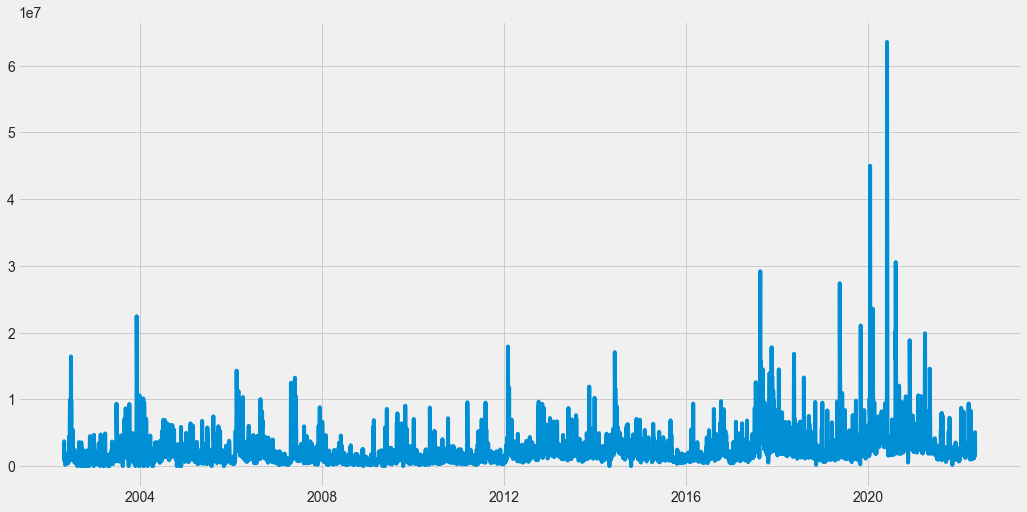

In [39]:
plt.figure(figsize=(16,8))
plt.plot(Tata_df["Volume"],label='Volume history')

In [40]:
Tata_df["Open"].iplot(kind = 'line',title = 'Open Price History')

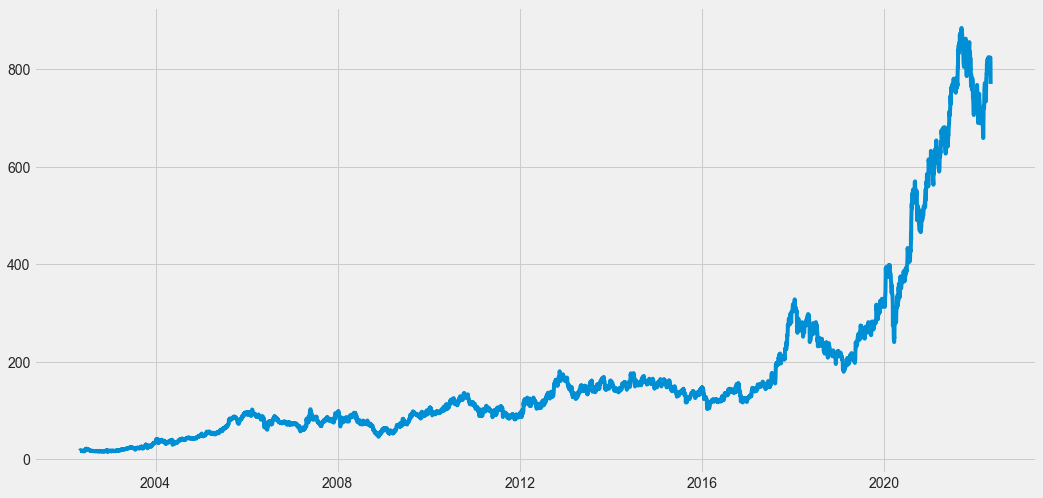

In [41]:
plt.figure(figsize=(16,8))
plt.plot(Tata_df["Open"],label='Open Price history')

In [42]:
## Caculating the Moving Average of our Dataset ##

In [43]:
ma_day = [10, 20, 50]

for ma in ma_day:
    
        column_name = f"MA for {ma} days"
        Tata_df[column_name] = Tata_df['Adj Close'].rolling(ma).mean()

In [44]:
print(Tata_df)

                 Date        Open        High         Low       Close  \
Date                                                                    
2002-05-01 2002-05-01   16.639999   16.639999   16.639999   16.639999   
2002-05-02 2002-05-02   16.799999   17.565001   16.665001   17.260000   
2002-05-03 2002-05-03   17.400000   17.480000   17.215000   17.405001   
2002-05-06 2002-05-06   17.450001   17.799999   17.285000   17.520000   
2002-05-07 2002-05-07   17.400000   17.690001   17.375000   17.469999   
...               ...         ...         ...         ...         ...   
2022-04-29 2022-04-29  815.000000  835.250000  813.000000  823.750000   
2022-05-02 2022-05-02  823.299988  828.650024  810.000000  824.400024   
2022-05-04 2022-05-04  824.400024  832.000000  800.799988  803.299988   
2022-05-05 2022-05-05  810.000000  812.000000  772.500000  776.349976   
2022-05-06 2022-05-06  770.000000  778.500000  762.950012  764.950012   

             Adj Close        Volume  MA for 10 da

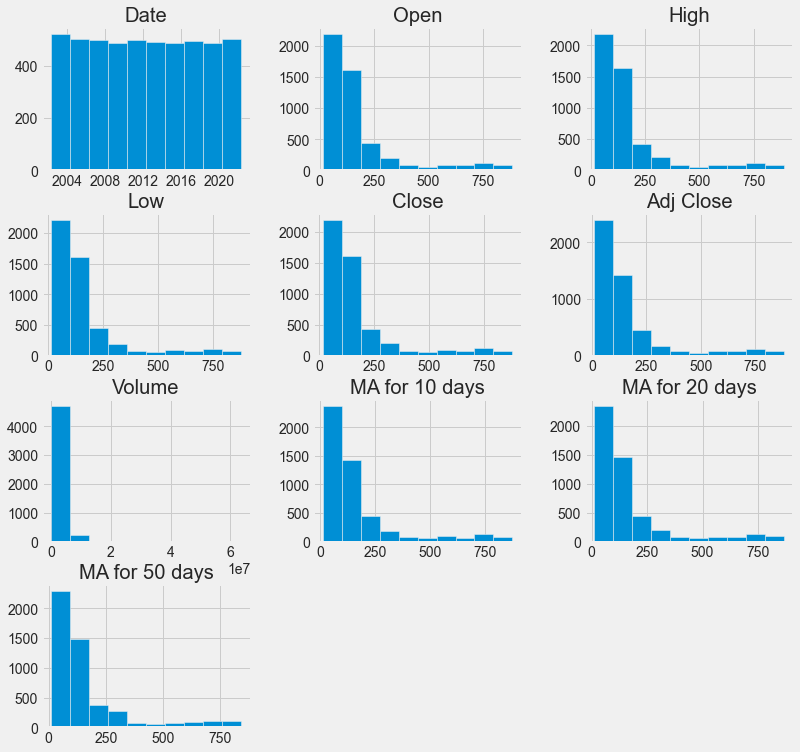

In [45]:
Tata_df.hist(figsize=(12, 12));

In [46]:
## PLotting the Moving Average ##

Text(0.5, 1.0, 'Tata Consumer Products Ltd')

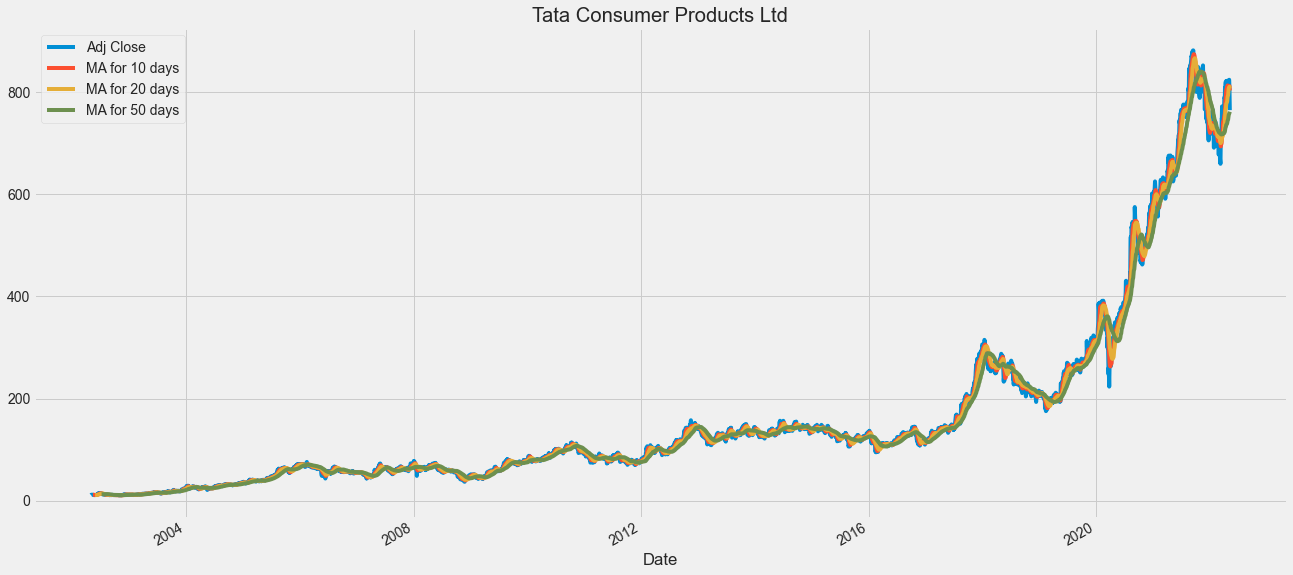

In [48]:

fig.set_figheight(8)
fig.set_figwidth(15)
Tata_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot().set_title('Tata Consumer Products Ltd')


In [49]:
## Calculating Daily Return of the Stock on Average(Using Pandas) ##

In [50]:
Tata_df['Daily Return'] = Tata_df['Adj Close'].pct_change()

Text(0.5, 1.0, 'Tata Consumer Products Ltd')

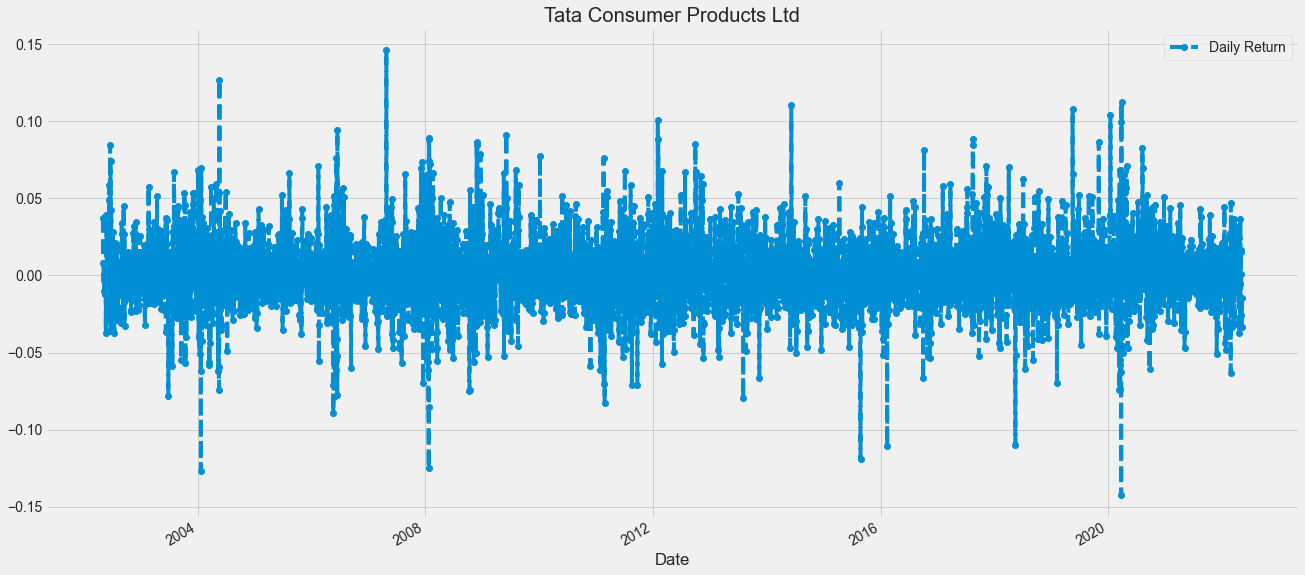

In [51]:
fig.set_figheight(8)
fig.set_figwidth(15)
Tata_df['Daily Return'].plot(legend=True, linestyle='--', marker='o').set_title('Tata Consumer Products Ltd')


In [52]:
## Overall look at the average daily return using a histogram.(Using seaborn) ##

Text(0.5, 1.0, 'Tata Consumer Products Ltd')

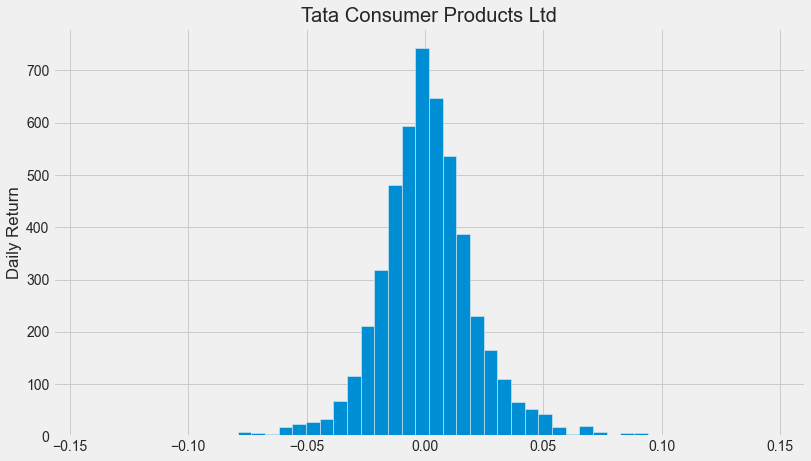

In [53]:
plt.figure(figsize=(12, 7))
Tata_df['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title('Tata Consumer Products Ltd')